# Obtención y Análisis de datos

In [2]:
%pip install medmnist

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement medmnist (from versions: none)
ERROR: No matching distribution found for medmnist

[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: D:\Users\bcortes\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [8]:
import medmnist

In [9]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras import layers, models

In [10]:
dataTrain = medmnist.BreastMNIST(split="train", download=True, size=224)
dataVal   = medmnist.BreastMNIST(split="val",   download=True, size=224)
dataTest  = medmnist.BreastMNIST(split="test",  download=True, size=224)

In [11]:
print(f'Largo de la muestra de prueba     = {len(dataTrain)}')
print(f'Largo de la muestra de validación = {len(dataVal)}')
print(f'Largo de la muestra de testeo     = {len(dataTest)}')

Largo de la muestra de prueba     = 546
Largo de la muestra de validación = 78
Largo de la muestra de testeo     = 156


In [12]:
dataTest.info

{'python_class': 'BreastMNIST',
 'description': 'The BreastMNIST is based on a dataset of 780 breast ultrasound images. It is categorized into 3 classes: normal, benign, and malignant. As we use low-resolution images, we simplify the task into binary classification by combining normal and benign as positive and classifying them against malignant as negative. We split the source dataset with a ratio of 7:1:2 into training, validation and test set. The source images of 1×500×500 are resized into 1×28×28.',
 'url': 'https://zenodo.org/records/10519652/files/breastmnist.npz?download=1',
 'MD5': '750601b1f35ba3300ea97c75c52ff8f6',
 'url_64': 'https://zenodo.org/records/10519652/files/breastmnist_64.npz?download=1',
 'MD5_64': '742edef2a1fd1524b2efff4bd7ba9364',
 'url_128': 'https://zenodo.org/records/10519652/files/breastmnist_128.npz?download=1',
 'MD5_128': '363e4b3f8d712e9b5de15470a2aaadf1',
 'url_224': 'https://zenodo.org/records/10519652/files/breastmnist_224.npz?download=1',
 'MD5_224

In [13]:
x_train, y_train = np.array([i[0] for i in dataTrain]), np.array([i[1][0] for i in dataTrain])
x_val, y_val =  np.array([i[0] for i in dataVal]), np.array([i[1][0] for i in dataVal])
x_test, y_test =  np.array([i[0] for i in dataTest]), np.array([i[1][0] for i in dataTest])

In [14]:
x_train = x_train / 255
x_val = x_val / 255
x_test = x_test / 255

In [15]:
datasetCompleto = []
for i in range(len(x_train)):
    datasetCompleto.append((x_train[i], y_train[i]))
for i in range(len(x_val)):
    datasetCompleto.append((x_val[i], y_val[i]))
for i in range(len(x_test)):
    datasetCompleto.append((x_test[i], y_test[i]))

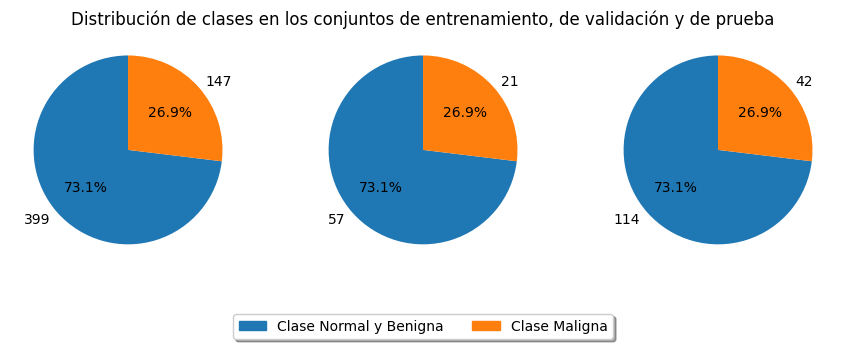

In [16]:
fig, axes = plt.subplots(1, 3, figsize=(9, 3))

train_counts = pd.Series(y_train).value_counts()
wedges1, texts1, autotexts1 = axes[0].pie(train_counts, labels=train_counts.values, autopct='%1.1f%%', startangle=90)

val_counts = pd.Series(y_val).value_counts()
wedges3, texts3, autotexts3 = axes[1].pie(val_counts, labels=val_counts.values, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Distribución de clases en los conjuntos de entrenamiento, de validación y de prueba')

test_counts = pd.Series(y_test).value_counts()
wedges2, texts2, autotexts2 = axes[2].pie(test_counts, labels=test_counts.values, autopct='%1.1f%%', startangle=90)

handles = [plt.Rectangle((0,0),1,1, color=c) for c in plt.cm.tab10(np.arange(len(train_counts)))]
labels = ['Clase Normal y Benigna', 'Clase Maligna']
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=len(train_counts))

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


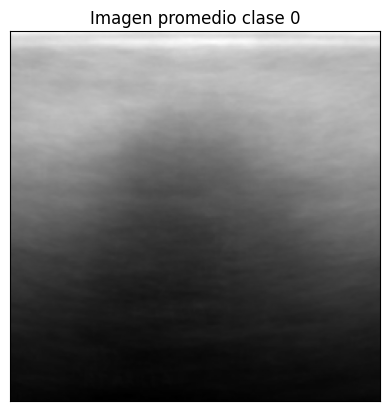

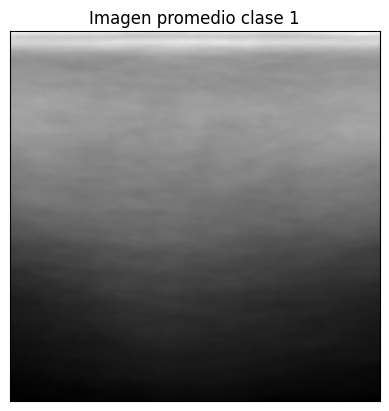

In [17]:
class_0 = np.array([img for img, label in datasetCompleto if label == 0])
class_1 = np.array([img for img, label in datasetCompleto if label == 1])

mean_0 = np.mean(class_0, axis=0)
mean_1 = np.mean(class_1, axis=0)

plt.title('Imagen promedio clase 0')
plt.xticks([])
plt.yticks([])
plt.imshow(mean_0.squeeze(), cmap='gray')

plt.show()

plt.imshow(mean_1.squeeze(), cmap='gray')
plt.title('Imagen promedio clase 1')
plt.xticks([])
plt.yticks([])

plt.show()

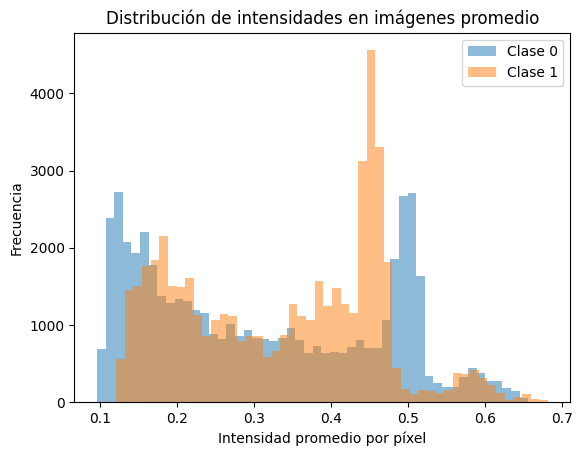

Clase 0 - Bajo: 52.06074617346939 % Medio: 47.93925382653061 % Alto: 0.0 %
Clase 1 - Bajo: 41.392299107142854 % Medio: 58.607700892857146 % Alto: 0.0 %


In [18]:
class_0 = np.array([img for img, label in datasetCompleto if label == 0])
class_1 = np.array([img for img, label in datasetCompleto if label == 1])

mean_0 = np.mean(class_0, axis=0)
mean_1 = np.mean(class_1, axis=0)

plt.hist(mean_0.ravel(), bins=50, alpha=0.5, label='Clase 0')
plt.hist(mean_1.ravel(), bins=50, alpha=0.5, label='Clase 1')
plt.xlabel('Intensidad promedio por píxel')
plt.ylabel('Frecuencia')
plt.title('Distribución de intensidades en imágenes promedio')
plt.legend()
plt.show()

def porcentaje_en_rango(imagen, low, high):
    total = imagen.size
    en_rango = np.logical_and(imagen >= low, imagen <= high).sum()
    return 100 * en_rango / total

r0_bajo = porcentaje_en_rango(mean_0, 0.0, 0.3)
r0_medio = porcentaje_en_rango(mean_0, 0.3, 0.7)
r0_alto = porcentaje_en_rango(mean_0, 0.7, 1.0)

r1_bajo = porcentaje_en_rango(mean_1, 0.0, 0.3)
r1_medio = porcentaje_en_rango(mean_1, 0.3, 0.7)
r1_alto = porcentaje_en_rango(mean_1, 0.7, 1.0)

print("Clase 0 - Bajo:", r0_bajo, "% Medio:", r0_medio, "% Alto:", r0_alto, "%")
print("Clase 1 - Bajo:", r1_bajo, "% Medio:", r1_medio, "% Alto:", r1_alto, "%")



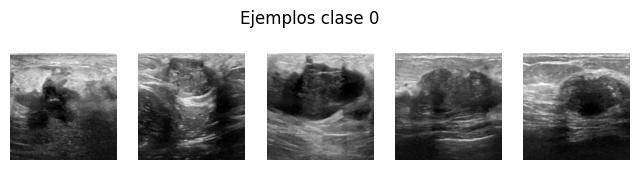

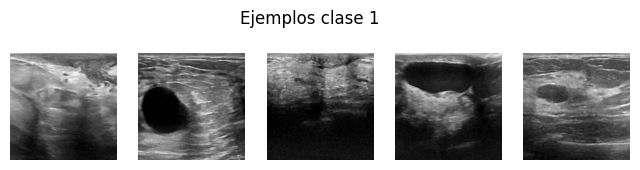

In [19]:
samples_0 = random.sample([img for img, label in datasetCompleto if label == 0], 5)
samples_1 = random.sample([img for img, label in datasetCompleto if label == 1], 5)
fig, axs = plt.subplots(1, 5, figsize=(8, 2))
for i, img in enumerate(samples_0):
    axs[i].imshow(img.squeeze(), cmap='gray')
    axs[i].axis('off')
fig.suptitle('Ejemplos clase 0')
plt.show()

fig, axs = plt.subplots(1, 5, figsize=(8, 2))
for i, img in enumerate(samples_1):
    axs[i].imshow(img.squeeze(), cmap='gray')
    axs[i].axis('off')
fig.suptitle('Ejemplos clase 1')
plt.show()

In [20]:
x_train = np.expand_dims(x_train, axis=-1)
x_val = np.expand_dims(x_val, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

print(f'Shape de x_train: {x_train.shape}')
print(f'Shape de x_val: {x_val.shape}')
print(f'Shape de x_test: {x_test.shape}')

Shape de x_train: (546, 224, 224, 1)
Shape de x_val: (78, 224, 224, 1)
Shape de x_test: (156, 224, 224, 1)


# CNN Base

Basada en la red vista en clases

In [15]:
modeloBase = models.Sequential([
    # Primera convolución: 10 filtros, kernel 5x5, entrada 224x224x1
    layers.Conv2D(10, (5,5), activation='relu', input_shape=(224,224,1)),
    layers.MaxPooling2D(pool_size=(2,2)),
    # Segunda convolución: 20 filtros, kernel 5x5
    layers.Conv2D(20, (5,5), activation='relu'),
    layers.Dropout(0.5),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Flatten(),
    layers.Dense(50, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Para clasificación binaria
])

modeloBase.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

c:\Users\bobaz\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
tensorboardBase = TensorBoard(log_dir='logs/base')
modeloBase.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=30,
    batch_size=32,
    callbacks=[tensorboardBase]
)

Epoch 1/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 213ms/step - accuracy: 0.6021 - loss: 1.0318 - val_accuracy: 0.7308 - val_loss: 0.6073
Epoch 2/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 192ms/step - accuracy: 0.7334 - loss: 0.5726 - val_accuracy: 0.7308 - val_loss: 0.5704
Epoch 3/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 192ms/step - accuracy: 0.7372 - loss: 0.4898 - val_accuracy: 0.8077 - val_loss: 0.5233
Epoch 4/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 195ms/step - accuracy: 0.8267 - loss: 0.4629 - val_accuracy: 0.7949 - val_loss: 0.4275
Epoch 5/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 195ms/step - accuracy: 0.8372 - loss: 0.3920 - val_accuracy: 0.8462 - val_loss: 0.4114
Epoch 6/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 191ms/step - accuracy: 0.8323 - loss: 0.3515 - val_accuracy: 0.8333 - val_loss: 0.4205
Epoch 7/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 190ms/step - accuracy: 0.8653 - loss: 0.3121 - val_accuracy: 0.8590 - val_loss: 0.3766
Epoch 8/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 190ms/step - accuracy: 0.9197 - loss: 0.2228 - val_accuracy: 0.

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, precision_recall_curve, average_precision_score

def generar_graficos(modelo, x_test, y_test, print=True):
    y_pred_prob = modelo.predict(x_test, verbose=0).ravel()
    y_pred = (y_pred_prob > 0.5).astype(int)

    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    if print: 
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot(cmap=plt.cm.Blues)

    # Calcular métricas
    accuracy = (y_pred == y_test).mean()
    recall = cm[1,1] / (cm[1,1] + cm[1,0]) if (cm[1,1] + cm[1,0]) > 0 else 0
    precision = cm[1,1] / (cm[1,1] + cm[0,1]) if (cm[1,1] + cm[0,1]) > 0 else 0
    if print: 
        plt.title('Matriz de Confusión')
        plt.suptitle(f'Accuracy: {accuracy:.2f}\nRecall: {recall:.2f}\nPrecision: {precision:.2f}', fontsize=10, y=0.92, x=0.08)
        plt.show()

    # Curva ROC
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    if print: 
        plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel('Tasa de Falsos Positivos')
        plt.ylabel('Tasa de Verdaderos Positivos')
        plt.title('Curva ROC')
        plt.legend()
        plt.show()

    # Curva Precision-Recall
    precision_curva, recall_curva, _ = precision_recall_curve(y_test, y_pred_prob)
    auc_pr = auc(recall_curva, precision_curva)
    if print: 
        plt.plot(recall_curva, precision_curva, label=f'AUC = {auc_pr:.2f}')
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title('Curva Precision-Recall')
        plt.legend()
        plt.show()

    return {
        'pred': y_pred,
        'accuracy': accuracy,
        'recall': recall,
        'precision': precision,
        'roc_auc': roc_auc,
        'auc_pr': auc_pr,
        'roc_curve': (fpr, tpr),
        'precision_recall_curve': (precision_curva, recall_curva)
    }


#est_base = generar_graficos(modeloBase, x_test, y_test, True)

# Afinación de hiperparámetros del modelo base

## Tamaño de entrada

MedMNIST soporta la descarga de imágenes con dimensiones de 28x28, 64x64, 128x128 y 224x224, y la de 224x224 ya la testeamos

### 128x128

In [44]:
dataTrain128 = medmnist.BreastMNIST(split="train", download=True, size=128)
dataVal128   = medmnist.BreastMNIST(split="val",   download=True, size=128)
dataTest128  = medmnist.BreastMNIST(split="test",  download=True, size=128)

# Hay que realizar el preprocesamiento denuevo
x_train128, y_train128 = np.array([i[0] for i in dataTrain128]), np.array([i[1][0] for i in dataTrain128])
x_val128, y_val128 =  np.array([i[0] for i in dataVal128]), np.array([i[1][0] for i in dataVal128])
x_test128, y_test128 =  np.array([i[0] for i in dataTest128]), np.array([i[1][0] for i in dataTest128])

x_train128 = x_train128 / 255
x_val128 = x_val128 / 255
x_test128 = x_test128 / 255

x_train128 = np.expand_dims(x_train128, axis=-1)
x_val128 = np.expand_dims(x_val128, axis=-1)
x_test128 = np.expand_dims(x_test128, axis=-1)

In [45]:
modeloBase128 = models.Sequential([
    # Primera convolución: 10 filtros, kernel 5x5, entrada 128x128x1
    layers.Conv2D(10, (5,5), activation='relu', input_shape=(128,128,1)),
    layers.MaxPooling2D(pool_size=(2,2)),
    # Segunda convolución: 20 filtros, kernel 5x5
    layers.Conv2D(20, (5,5), activation='relu'),
    layers.Dropout(0.5),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Flatten(),
    layers.Dense(50, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Para clasificación binaria
])

modeloBase128.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

tensorboardBase128 = TensorBoard(log_dir='logs/base128')
modeloBase128.fit(
    x_train128, y_train128,
    validation_data=(x_val128, y_val128),
    epochs=30,
    batch_size=32,
    callbacks=[tensorboardBase128]
)

Epoch 1/30


c:\Users\bobaz\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 88ms/step - accuracy: 0.6870 - loss: 0.5629 - val_accuracy: 0.7308 - val_loss: 0.4950
Epoch 2/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - accuracy: 0.7658 - loss: 0.4842 - val_accuracy: 0.8590 - val_loss: 0.4398
Epoch 3/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.8250 - loss: 0.4097 - val_accuracy: 0.8205 - val_loss: 0.4316
Epoch 4/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - accuracy: 0.8041 - loss: 0.4213 - val_accuracy: 0.8846 - val_loss: 0.3623
Epoch 5/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - accuracy: 0.8553 - loss: 0.3228 - val_accuracy: 0.8846 - val_loss: 0.3759
Epoch 6/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.8513 - loss: 0.3597 - val_accuracy: 0.8333 - val_loss: 0.3892
Epoch 7/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - accuracy: 0.8856 - loss: 0.2887 - val_accuracy: 0.8718 - val_loss: 0.3483
Epoch 8/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - accuracy: 0.8804 - loss: 0.2449 - val_accuracy: 0.8846 - val_loss: 0.

In [59]:
est_base128 = generar_graficos(modeloBase128, x_test128, y_test128, False)

### 64x64

In [47]:
dataTrain64 = medmnist.BreastMNIST(split="train", download=True, size=64)
dataVal64   = medmnist.BreastMNIST(split="val",   download=True, size=64)
dataTest64  = medmnist.BreastMNIST(split="test",  download=True, size=64)

# Hay que realizar el preprocesamiento denuevo
x_train64, y_train64 = np.array([i[0] for i in dataTrain64]), np.array([i[1][0] for i in dataTrain64])
x_val64, y_val64 =  np.array([i[0] for i in dataVal64]), np.array([i[1][0] for i in dataVal64])
x_test64, y_test64 =  np.array([i[0] for i in dataTest64]), np.array([i[1][0] for i in dataTest64])

x_train64 = x_train64 / 255
x_val64 = x_val64 / 255
x_test64 = x_test64 / 255

x_train64 = np.expand_dims(x_train64, axis=-1)
x_val64 = np.expand_dims(x_val64, axis=-1)
x_test64 = np.expand_dims(x_test64, axis=-1)

100%|██████████| 2.85M/2.85M [00:08<00:00, 352kB/s]


In [48]:
modeloBase64 = models.Sequential([
    # Primera convolución: 10 filtros, kernel 5x5, entrada 64x64x1
    layers.Conv2D(10, (5,5), activation='relu', input_shape=(64,64,1)),
    layers.MaxPooling2D(pool_size=(2,2)),
    # Segunda convolución: 20 filtros, kernel 5x5
    layers.Conv2D(20, (5,5), activation='relu'),
    layers.Dropout(0.5),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Flatten(),
    layers.Dense(50, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Para clasificación binaria
])

modeloBase64.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

tensorboardBase64 = TensorBoard(log_dir='logs/base64')
modeloBase64.fit(
    x_train64, y_train64,
    validation_data=(x_val64, y_val64),
    epochs=30,
    batch_size=32,
    callbacks=[tensorboardBase64]
)

Epoch 1/30


c:\Users\bobaz\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.7254 - loss: 0.5667 - val_accuracy: 0.7821 - val_loss: 0.5679
Epoch 2/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7838 - loss: 0.5075 - val_accuracy: 0.7692 - val_loss: 0.5121
Epoch 3/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7381 - loss: 0.5293 - val_accuracy: 0.7692 - val_loss: 0.5832
Epoch 4/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7784 - loss: 0.5079 - val_accuracy: 0.8205 - val_loss: 0.4994
Epoch 5/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7869 - loss: 0.4737 - val_accuracy: 0.7821 - val_loss: 0.4823
Epoch 6/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7542 - loss: 0.5116 - val_accuracy: 0.8205 - val_loss: 0.5100
Epoch 7/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7941 - loss: 0.4537 - val_accuracy: 0.7949 - val_loss: 0.5167
Epoch 8/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7967 - loss: 0.4440 - val_accuracy: 0.8333 - val_loss: 0.

In [60]:
est_base64 = generar_graficos(modeloBase64, x_test64, y_test64, False)

### 28x28

In [52]:
dataTrain28 = medmnist.BreastMNIST(split="train", download=True, size=28)
dataVal28   = medmnist.BreastMNIST(split="val",   download=True, size=28)
dataTest28  = medmnist.BreastMNIST(split="test",  download=True, size=28)

# Hay que realizar el preprocesamiento denuevo
x_train28, y_train28 = np.array([i[0] for i in dataTrain28]), np.array([i[1][0] for i in dataTrain28])
x_val28, y_val28 =  np.array([i[0] for i in dataVal28]), np.array([i[1][0] for i in dataVal28])
x_test28, y_test28 =  np.array([i[0] for i in dataTest28]), np.array([i[1][0] for i in dataTest28])

x_train28 = x_train28 / 255
x_val28 = x_val28 / 255
x_test28 = x_test28 / 255

x_train28 = np.expand_dims(x_train28, axis=-1)
x_val28 = np.expand_dims(x_val28, axis=-1)
x_test28 = np.expand_dims(x_test28, axis=-1)

100%|██████████| 560k/560k [00:01<00:00, 285kB/s] 


In [53]:
modeloBase28 = models.Sequential([
    # Primera convolución: 10 filtros, kernel 5x5, entrada 28x28x1
    layers.Conv2D(10, (5,5), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D(pool_size=(2,2)),
    # Segunda convolución: 20 filtros, kernel 5x5
    layers.Conv2D(20, (5,5), activation='relu'),
    layers.Dropout(0.5),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Flatten(),
    layers.Dense(50, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Para clasificación binaria
])

modeloBase28.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

tensorboardBase28 = TensorBoard(log_dir='logs/base28')
modeloBase28.fit(
    x_train28, y_train28,
    validation_data=(x_val28, y_val28),
    epochs=30,
    batch_size=32,
    callbacks=[tensorboardBase28]
)

Epoch 1/30


c:\Users\bobaz\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.7073 - loss: 0.5943 - val_accuracy: 0.7308 - val_loss: 0.5579
Epoch 2/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7298 - loss: 0.5483 - val_accuracy: 0.7308 - val_loss: 0.5451
Epoch 3/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7312 - loss: 0.5232 - val_accuracy: 0.8333 - val_loss: 0.5532
Epoch 4/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8049 - loss: 0.4897 - val_accuracy: 0.7821 - val_loss: 0.5297
Epoch 5/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7906 - loss: 0.4875 - val_accuracy: 0.8333 - val_loss: 0.5351
Epoch 6/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7960 - loss: 0.5103 - val_accuracy: 0.7949 - val_loss: 0.4783
Epoch 7/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7606 - loss: 0.5144 - val_accuracy: 0.8333 - val_loss: 0.4878
Epoch 8/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8036 - loss: 0.4566 - val_accuracy: 0.8077 - val_loss: 0.4775
Ep

In [61]:
est_base28 = generar_graficos(modeloBase28, x_test28, y_test28, False)

### Análisis de los tamaños de entrada

,Tamaño,Accuracy,Precision,Recall
0,224x224,0.865385,0.878049,0.947368
1,128x128,0.826923,0.848000,0.929825
2,64x64,0.820513,0.841270,0.929825
3,28x28,0.826923,0.842520,0.938596


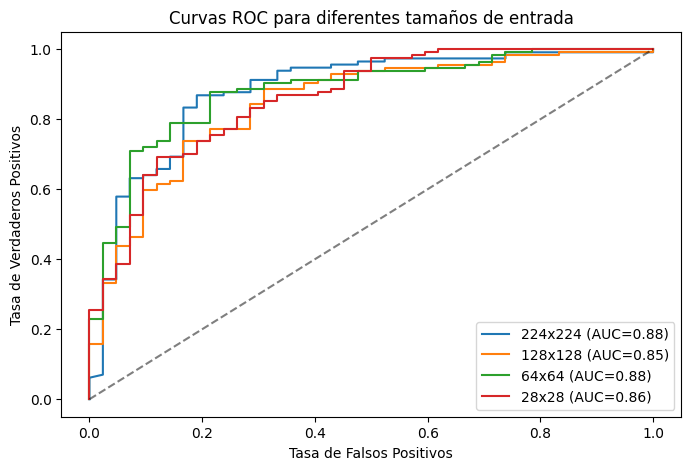

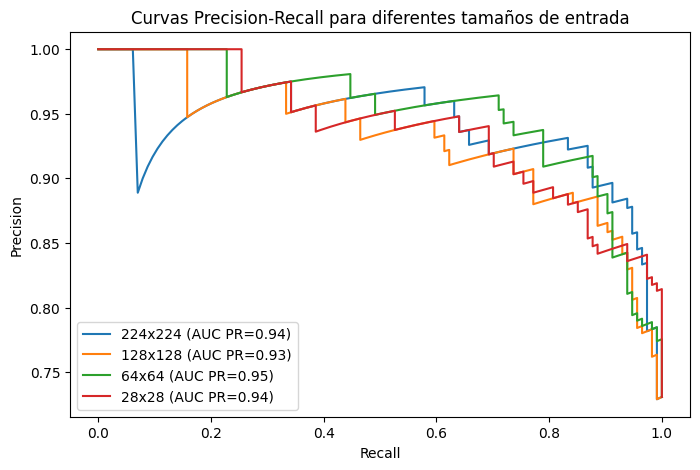

In [84]:
from IPython.display import display

resultados = pd.DataFrame({
    'Tamaño': ['224x224', '128x128', '64x64', '28x28'],
    'Accuracy': [
        est_base['accuracy'],
        est_base128['accuracy'],
        est_base64['accuracy'],
        est_base28['accuracy']
    ],
    'Precision': [
        est_base['precision'],
        est_base128['precision'],
        est_base64['precision'],
        est_base28['precision']
    ],
    'Recall': [
        est_base['recall'],
        est_base128['recall'],
        est_base64['recall'],
        est_base28['recall']
    ]
})

display(resultados)

# Gráfica ROC para todos los tamaños
plt.figure(figsize=(8,5))
plt.plot(est_base['roc_curve'][0], est_base['roc_curve'][1], label=f'224x224 (AUC={est_base["roc_auc"]:.2f})')
plt.plot(est_base128['roc_curve'][0], est_base128['roc_curve'][1], label=f'128x128 (AUC={est_base128["roc_auc"]:.2f})')
plt.plot(est_base64['roc_curve'][0], est_base64['roc_curve'][1], label=f'64x64 (AUC={est_base64["roc_auc"]:.2f})')
plt.plot(est_base28['roc_curve'][0], est_base28['roc_curve'][1], label=f'28x28 (AUC={est_base28["roc_auc"]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', alpha=0.5)
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curvas ROC para diferentes tamaños de entrada')
plt.legend()
plt.show()

# Gráfica Precision-Recall para todos los tamaños
plt.figure(figsize=(8,5))
plt.plot(est_base['precision_recall_curve'][1], est_base['precision_recall_curve'][0], label=f'224x224 (AUC PR={est_base["auc_pr"]:.2f})')
plt.plot(est_base128['precision_recall_curve'][1], est_base128['precision_recall_curve'][0], label=f'128x128 (AUC PR={est_base128["auc_pr"]:.2f})')
plt.plot(est_base64['precision_recall_curve'][1], est_base64['precision_recall_curve'][0], label=f'64x64 (AUC PR={est_base64["auc_pr"]:.2f})')
plt.plot(est_base28['precision_recall_curve'][1], est_base28['precision_recall_curve'][0], label=f'28x28 (AUC PR={est_base28["auc_pr"]:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curvas Precision-Recall para diferentes tamaños de entrada')
plt.legend()
plt.show()

## Tamaños de Kernel

En el de base se usaron kernels de 5x5 pero otros tamaños están disponibles

In [87]:
# Nueva función para crear modelos más eficientemente
def modeloCustomizable(
    input_shape=(224, 224, 1), 
    num_filtros=[10, 20], 
    tamano_kernel=(5, 5), 
    capas_densas=[50], 
    dropout_rate=[0.5, 0],
    dropout_rate_final=0.5,
):
    if len(num_filtros) != len(dropout_rate):
        raise ValueError("""
            El largo de num_filtros y el de dropout_rate representan la cantidad de 
            capas convolucionales, por lo que estas listas deben tener el mismo largo.
        """)
    capas_conv = [layers.Input(shape=input_shape)]
    for i in range(len(num_filtros)):
        capas_conv.append(layers.Conv2D(num_filtros[i], tamano_kernel, activation='relu'))
        capas_conv.append(layers.MaxPooling2D(pool_size=(2, 2)))
        if dropout_rate[i] > 0:
            capas_conv.append(layers.Dropout(dropout_rate[i]))

    capas_dens = [layers.Flatten()]
    for i in capas_densas:
        capas_dens.append(layers.Dense(i, activation='relu'))
    if dropout_rate_final > 0:
        capas_dens.append(layers.Dropout(dropout_rate_final))
    capas_dens.append(layers.Dense(1, activation='sigmoid'))

    capas_total = capas_conv + capas_dens
    model = models.Sequential(capas_total)
    
    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    
    return model

### 3x3

In [74]:
modeloKernel3x3 = modeloCustomizable(
    input_shape=(64, 64, 1),
    num_filtros=[10, 20],
    tamano_kernel=(3, 3),
    capas_densas=[50],
    dropout_rate=[0.5, 0],
    dropout_rate_final=0
)
tensorboardKernel3x3 = TensorBoard(log_dir='logs/kernel3x3')
modeloKernel3x3.fit(
    x_train64, y_train64,
    validation_data=(x_val64, y_val64),
    epochs=30,
    batch_size=32,
    callbacks=[tensorboardKernel3x3]
)

Epoch 1/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.7138 - loss: 0.6057 - val_accuracy: 0.7436 - val_loss: 0.5713
Epoch 2/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7384 - loss: 0.5307 - val_accuracy: 0.7692 - val_loss: 0.5792
Epoch 3/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7851 - loss: 0.4963 - val_accuracy: 0.7692 - val_loss: 0.5543
Epoch 4/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7850 - loss: 0.4786 - val_accuracy: 0.7821 - val_loss: 0.5746
Epoch 5/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7971 - loss: 0.4909 - val_accuracy: 0.8333 - val_loss: 0.5804
Epoch 6/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7650 - loss: 0.4921 - val_accuracy: 0.8077 - val_loss: 0.5173
Epoch 7/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7856 - loss: 0.4855 - val_accuracy: 0.8077 - val_loss: 0.5335
Epoch 8/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7763 - loss: 0.4818 - val_accuracy: 0.7821 - v

In [75]:
est_kernel3x3 = generar_graficos(modeloKernel3x3, x_test64, y_test64, False)

### 5x5

In [76]:
modeloKernel5x5 = modeloCustomizable(
    input_shape=(64, 64, 1),
    num_filtros=[10, 20],
    tamano_kernel=(5, 5),
    capas_densas=[50],
    dropout_rate=[0.5, 0],
    dropout_rate_final=0
)
tensorboardKernel5x5 = TensorBoard(log_dir='logs/kernel5x5')
modeloKernel5x5.fit(
    x_train64, y_train64,
    validation_data=(x_val64, y_val64),
    epochs=30,
    batch_size=32,
    callbacks=[tensorboardKernel5x5]
)

Epoch 1/30


c:\Users\bobaz\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.6404 - loss: 0.6217 - val_accuracy: 0.7308 - val_loss: 0.5852
Epoch 2/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7399 - loss: 0.5342 - val_accuracy: 0.7308 - val_loss: 0.5756
Epoch 3/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7287 - loss: 0.5328 - val_accuracy: 0.7308 - val_loss: 0.5465
Epoch 4/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7278 - loss: 0.5264 - val_accuracy: 0.7692 - val_loss: 0.5407
Epoch 5/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7537 - loss: 0.5339 - val_accuracy: 0.7692 - val_loss: 0.5169
Epoch 6/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7658 - loss: 0.4998 - val_accuracy: 0.7821 - val_loss: 0.5173
Epoch 7/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7513 - loss: 0.4889 - val_accuracy: 0.7692 - val_loss: 0.4575
Epoch 8/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7066 - loss: 0.5978 - val_accuracy: 0.7821 - val_loss: 0.

In [78]:
est_kernel5x5 = generar_graficos(modeloKernel5x5, x_test64, y_test64, False)

### 7x7

In [79]:
modeloKernel7x7 = modeloCustomizable(
    input_shape=(64, 64, 1),
    num_filtros=[10, 20],
    tamano_kernel=(7, 7),
    capas_densas=[50],
    dropout_rate=[0.5, 0],
    dropout_rate_final=0
)
tensorboardKernel7x7 = TensorBoard(log_dir='logs/kernel7x7')
modeloKernel7x7.fit(
    x_train64, y_train64,
    validation_data=(x_val64, y_val64),
    epochs=30,
    batch_size=32,
    callbacks=[tensorboardKernel7x7]
)

Epoch 1/30


c:\Users\bobaz\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.6894 - loss: 0.6001 - val_accuracy: 0.7308 - val_loss: 0.5834
Epoch 2/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7315 - loss: 0.5292 - val_accuracy: 0.7692 - val_loss: 0.5726
Epoch 3/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7488 - loss: 0.5269 - val_accuracy: 0.7564 - val_loss: 0.5006
Epoch 4/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7561 - loss: 0.5510 - val_accuracy: 0.7692 - val_loss: 0.4879
Epoch 5/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7451 - loss: 0.5362 - val_accuracy: 0.8077 - val_loss: 0.5142
Epoch 6/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7920 - loss: 0.4837 - val_accuracy: 0.7949 - val_loss: 0.4937
Epoch 7/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7820 - loss: 0.4834 - val_accuracy: 0.8333 - val_loss: 0.5029
Epoch 8/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7741 - loss: 0.4816 - val_accuracy: 0.7436 - val_loss: 0.

In [80]:
est_kernel7x7 = generar_graficos(modeloKernel7x7, x_test64, y_test64, False)

### 9x9

In [81]:
modeloKernel9x9 = modeloCustomizable(
    input_shape=(64, 64, 1),
    num_filtros=[10, 20],
    tamano_kernel=(9, 9),
    capas_densas=[50],
    dropout_rate=[0.5, 0],
    dropout_rate_final=0
)
tensorboardKernel9x9 = TensorBoard(log_dir='logs/kernel9x9')
modeloKernel9x9.fit(
    x_train64, y_train64,
    validation_data=(x_val64, y_val64),
    epochs=30,
    batch_size=32,
    callbacks=[tensorboardKernel9x9]
)

Epoch 1/30


c:\Users\bobaz\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.7044 - loss: 0.5973 - val_accuracy: 0.7436 - val_loss: 0.5361
Epoch 2/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7519 - loss: 0.5278 - val_accuracy: 0.7949 - val_loss: 0.5485
Epoch 3/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7690 - loss: 0.5135 - val_accuracy: 0.7821 - val_loss: 0.4771
Epoch 4/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7838 - loss: 0.4654 - val_accuracy: 0.8333 - val_loss: 0.5160
Epoch 5/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7957 - loss: 0.4993 - val_accuracy: 0.8462 - val_loss: 0.4545
Epoch 6/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8186 - loss: 0.4365 - val_accuracy: 0.8077 - val_loss: 0.5486
Epoch 7/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7841 - loss: 0.4998 - val_accuracy: 0.8077 - val_loss: 0.5076
Epoch 8/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7412 - loss: 0.5119 - val_accuracy: 0.8205 - val_loss: 0.

In [82]:
est_kernel9x9 = generar_graficos(modeloKernel9x9, x_test64, y_test64, False)

### Análisis de los tamaños de Kernel

,Kernel,Accuracy,Precision,Recall
0,3x3,0.794872,0.820312,0.921053
1,5x5,0.807692,0.833333,0.921053
2,7x7,0.852564,0.876033,0.929825
3,9x9,0.871795,0.885246,0.947368


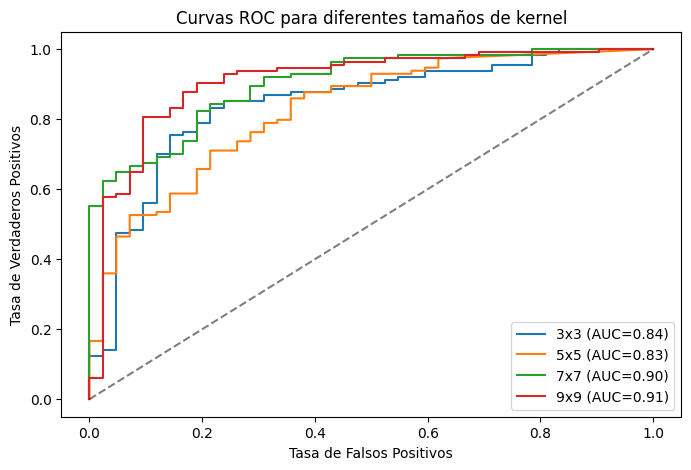

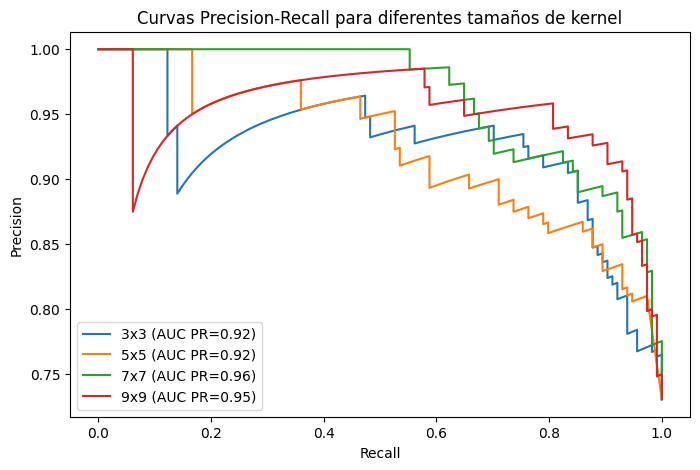

In [85]:
# Análisis de los tamaños de Kernel

resultados_kernels = pd.DataFrame({
    'Kernel': ['3x3', '5x5', '7x7', '9x9'],
    'Accuracy': [
        est_kernel3x3['accuracy'],
        est_kernel5x5['accuracy'],
        est_kernel7x7['accuracy'],
        est_kernel9x9['accuracy']
    ],
    'Precision': [
        est_kernel3x3['precision'],
        est_kernel5x5['precision'],
        est_kernel7x7['precision'],
        est_kernel9x9['precision']
    ],
    'Recall': [
        est_kernel3x3['recall'],
        est_kernel5x5['recall'],
        est_kernel7x7['recall'],
        est_kernel9x9['recall']
    ]
})

display(resultados_kernels)

# Gráfica ROC para todos los tamaños de kernel
plt.figure(figsize=(8,5))
plt.plot(est_kernel3x3['roc_curve'][0], est_kernel3x3['roc_curve'][1], label=f'3x3 (AUC={est_kernel3x3["roc_auc"]:.2f})')
plt.plot(est_kernel5x5['roc_curve'][0], est_kernel5x5['roc_curve'][1], label=f'5x5 (AUC={est_kernel5x5["roc_auc"]:.2f})')
plt.plot(est_kernel7x7['roc_curve'][0], est_kernel7x7['roc_curve'][1], label=f'7x7 (AUC={est_kernel7x7["roc_auc"]:.2f})')
plt.plot(est_kernel9x9['roc_curve'][0], est_kernel9x9['roc_curve'][1], label=f'9x9 (AUC={est_kernel9x9["roc_auc"]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', alpha=0.5)
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curvas ROC para diferentes tamaños de kernel')
plt.legend()
plt.show()

# Gráfica Precision-Recall para todos los tamaños de kernel
plt.figure(figsize=(8,5))
plt.plot(est_kernel3x3['precision_recall_curve'][1], est_kernel3x3['precision_recall_curve'][0], label=f'3x3 (AUC PR={est_kernel3x3["auc_pr"]:.2f})')
plt.plot(est_kernel5x5['precision_recall_curve'][1], est_kernel5x5['precision_recall_curve'][0], label=f'5x5 (AUC PR={est_kernel5x5["auc_pr"]:.2f})')
plt.plot(est_kernel7x7['precision_recall_curve'][1], est_kernel7x7['precision_recall_curve'][0], label=f'7x7 (AUC PR={est_kernel7x7["auc_pr"]:.2f})')
plt.plot(est_kernel9x9['precision_recall_curve'][1], est_kernel9x9['precision_recall_curve'][0], label=f'9x9 (AUC PR={est_kernel9x9["auc_pr"]:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curvas Precision-Recall para diferentes tamaños de kernel')
plt.legend()
plt.show()

## Cantidad de capas y filtros

En el modelo base se usaron 2 capas convolucionales, una con 10 filtros y otra con 20, pero se pueden explorar otras cantidades

In [91]:
cantidades_de_filtros = [5, 10, 20, 30]
cantidades_de_capas = [1,2,3]
resultados_filtros_capas = []
for capa in cantidades_de_capas:
    for filtro in cantidades_de_filtros:
        print(f'Entrenando modelo con {filtro} filtros y {capa} capas convolucionales...')
        modelo = modeloCustomizable(
            input_shape=(64, 64, 1),
            num_filtros=[filtro] * capa,
            tamano_kernel=(9, 9),
            capas_densas=[1] if capa == 3 else [50],
            dropout_rate=[0] * capa,
            dropout_rate_final=0
        )
        tensorboard = TensorBoard(log_dir=f'logs/filtros_{filtro}_capas_{capa}')
        modelo.fit(
            x_train64, y_train64,
            validation_data=(x_val64, y_val64),
            epochs=30,
            batch_size=32,
            callbacks=[tensorboard],
            verbose=0
        )
        est = generar_graficos(modelo, x_test64, y_test64, False)
        resultados_filtros_capas.append({
            'Filtros': filtro,
            'Capas': capa,
            'Estadisticas': est
        })

Entrenando modelo con 5 filtros y 1 capas convolucionales...
Entrenando modelo con 10 filtros y 1 capas convolucionales...
Entrenando modelo con 20 filtros y 1 capas convolucionales...
Entrenando modelo con 30 filtros y 1 capas convolucionales...
Entrenando modelo con 5 filtros y 2 capas convolucionales...
Entrenando modelo con 10 filtros y 2 capas convolucionales...
Entrenando modelo con 20 filtros y 2 capas convolucionales...
Entrenando modelo con 30 filtros y 2 capas convolucionales...
Entrenando modelo con 5 filtros y 3 capas convolucionales...
Entrenando modelo con 10 filtros y 3 capas convolucionales...
Entrenando modelo con 20 filtros y 3 capas convolucionales...
Entrenando modelo con 30 filtros y 3 capas convolucionales...


,Filtros,Capas,Accuracy,Precision,Recall
0,5,1,0.820513,0.877193,0.877193
1,10,1,0.820513,0.864407,0.894737
2,20,1,0.814103,0.845528,0.912281
3,30,1,0.839744,0.873950,0.912281
4,5,2,0.846154,0.826087,1.000000
5,10,2,0.833333,0.854839,0.929825
6,20,2,0.839744,0.861789,0.929825
7,30,2,0.820513,0.921569,0.824561
8,5,3,0.730769,0.730769,1.000000
9,10,3,0.775641,0.843478,0.850877


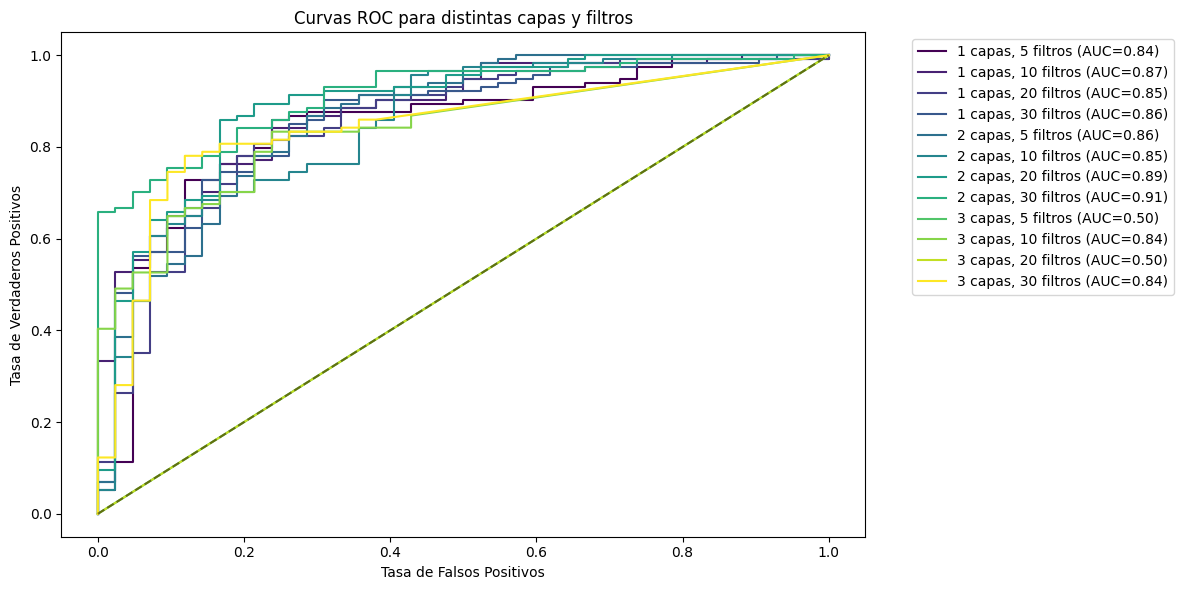

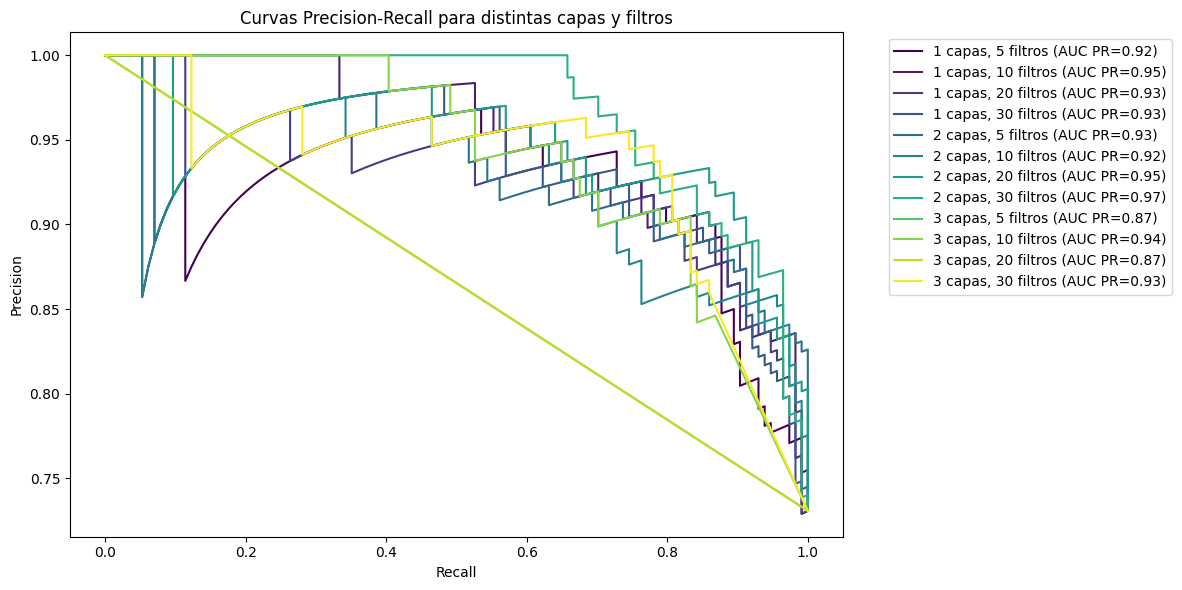

In [93]:
df_resultados = pd.DataFrame([
    {
        'Filtros': r['Filtros'],
        'Capas': r['Capas'],
        'Accuracy': r['Estadisticas']['accuracy'],
        'Precision': r['Estadisticas']['precision'],
        'Recall': r['Estadisticas']['recall'],
        'AUC ROC': r['Estadisticas']['roc_auc'],
        'AUC PR': r['Estadisticas']['auc_pr'],
        'ROC': r['Estadisticas']['roc_curve'],
        'PRC': r['Estadisticas']['precision_recall_curve']
    }
    for r in resultados_filtros_capas
])

# Mostrar tabla de resultados principales
display(df_resultados[['Filtros', 'Capas', 'Accuracy', 'Precision', 'Recall']])

# Gráfico ROC para todas las combinaciones
plt.figure(figsize=(12, 6))
colors = plt.cm.viridis(np.linspace(0, 1, len(df_resultados)))
for idx, row in df_resultados.iterrows():
    label = f"{row['Capas']} capas, {row['Filtros']} filtros (AUC={row['AUC ROC']:.2f})"
    plt.plot(row['ROC'][0], row['ROC'][1], color=colors[idx], label=label)
plt.plot([0, 1], [0, 1], 'k--', alpha=0.5)
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curvas ROC para distintas capas y filtros')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Gráfico Precision-Recall para todas las combinaciones
plt.figure(figsize=(12, 6))
for idx, row in df_resultados.iterrows():
    label = f"{row['Capas']} capas, {row['Filtros']} filtros (AUC PR={row['AUC PR']:.2f})"
    plt.plot(row['PRC'][1], row['PRC'][0], color=colors[idx], label=label)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curvas Precision-Recall para distintas capas y filtros')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Dropouts (capas convolucionales)

Se continua con los mejores resultados obtenidos (2 capas de 30 filtros, kernels de 9x9, y tamaños de 64x64) y se experimenta con los dropouts de las capas convolucionales

In [94]:
dropout_rates = [0.0, 0.2, 0.5, 0.7]
resultados_dropout = []
for rate1 in dropout_rates:
    for rate2 in dropout_rates:
        print(f'Entrenando modelo con Dropout {rate1} y {rate2}...')
        modelo = modeloCustomizable(
            input_shape=(64, 64, 1),
            num_filtros=[30, 30],
            tamano_kernel=(9, 9),
            capas_densas=[50],
            dropout_rate=[rate1, rate2],
            dropout_rate_final=0.5
        )
        tensorboard = TensorBoard(log_dir=f'logs/dropout_{rate1}_{rate2}')
        modelo.fit(
            x_train64, y_train64,
            validation_data=(x_val64, y_val64),
            epochs=30,
            batch_size=32,
            callbacks=[tensorboard],
            verbose=0
        )
        est = generar_graficos(modelo, x_test64, y_test64, False)
        resultados_dropout.append({
            'Dropout1': rate1,
            'Dropout2': rate2,
            'Estadisticas': est
        })

Entrenando modelo con Dropout 0.0 y 0.0...
Entrenando modelo con Dropout 0.0 y 0.2...
Entrenando modelo con Dropout 0.0 y 0.5...
Entrenando modelo con Dropout 0.0 y 0.7...
Entrenando modelo con Dropout 0.2 y 0.0...
Entrenando modelo con Dropout 0.2 y 0.2...
Entrenando modelo con Dropout 0.2 y 0.5...
Entrenando modelo con Dropout 0.2 y 0.7...
Entrenando modelo con Dropout 0.5 y 0.0...
Entrenando modelo con Dropout 0.5 y 0.2...
Entrenando modelo con Dropout 0.5 y 0.5...
Entrenando modelo con Dropout 0.5 y 0.7...
Entrenando modelo con Dropout 0.7 y 0.0...
Entrenando modelo con Dropout 0.7 y 0.2...
Entrenando modelo con Dropout 0.7 y 0.5...
Entrenando modelo con Dropout 0.7 y 0.7...


,Dropout1,Dropout2,Accuracy,Precision,Recall
0,0.0,0.0,0.839744,0.839695,0.964912
1,0.0,0.2,0.794872,0.815385,0.929825
2,0.0,0.5,0.814103,0.904762,0.833333
3,0.0,0.7,0.801282,0.802920,0.964912
4,0.2,0.0,0.820513,0.811594,0.982456
5,0.2,0.2,0.852564,0.864000,0.947368
6,0.2,0.5,0.807692,0.850000,0.894737
7,0.2,0.7,0.756410,0.801587,0.885965
8,0.5,0.0,0.846154,0.835821,0.982456
9,0.5,0.2,0.833333,0.843750,0.947368


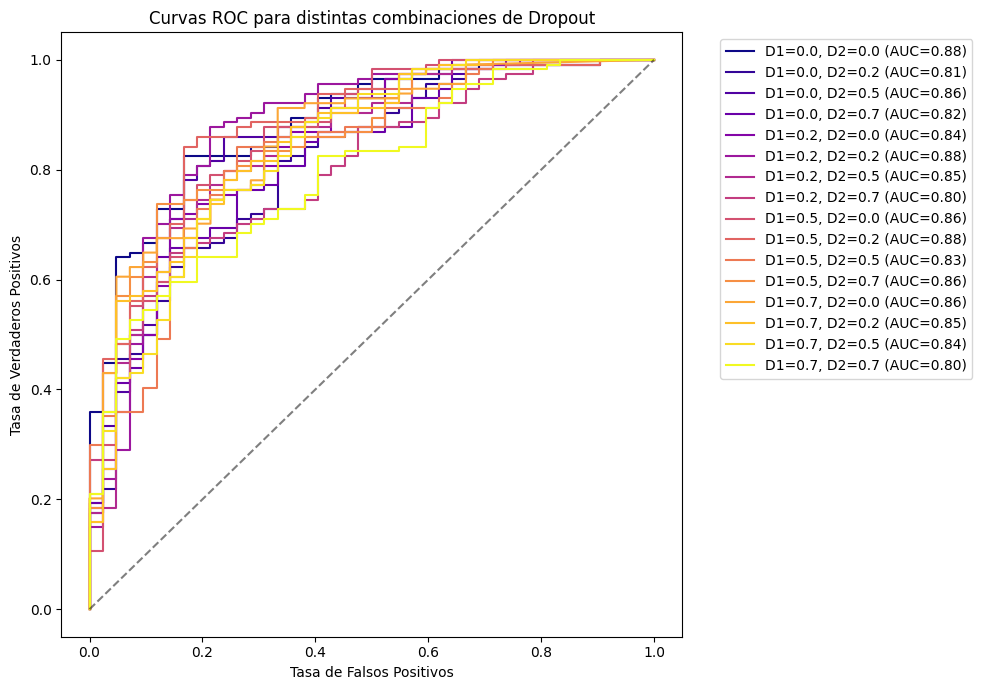

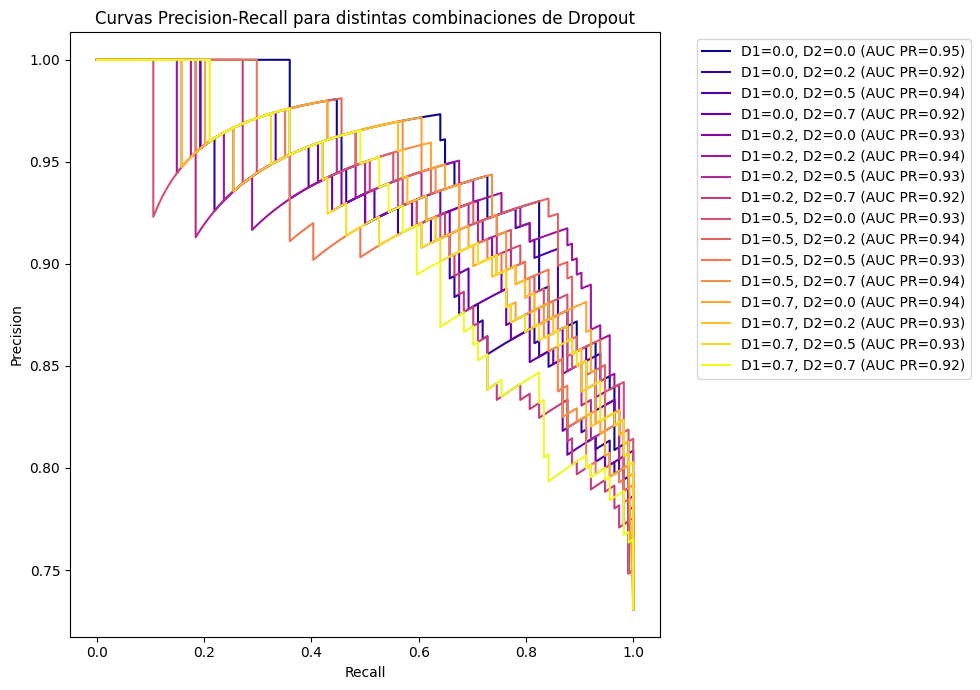

In [95]:
df_dropout = pd.DataFrame([
    {
        'Dropout1': r['Dropout1'],
        'Dropout2': r['Dropout2'],
        'Accuracy': r['Estadisticas']['accuracy'],
        'Precision': r['Estadisticas']['precision'],
        'Recall': r['Estadisticas']['recall'],
        'AUC ROC': r['Estadisticas']['roc_auc'],
        'AUC PR': r['Estadisticas']['auc_pr'],
        'ROC': r['Estadisticas']['roc_curve'],
        'PRC': r['Estadisticas']['precision_recall_curve']
    }
    for r in resultados_dropout
])

# Mostrar tabla de resultados principales
display(df_dropout[['Dropout1', 'Dropout2', 'Accuracy', 'Precision', 'Recall']])

# Gráfico ROC para todas las combinaciones de dropout
plt.figure(figsize=(10, 7))
colors = plt.cm.plasma(np.linspace(0, 1, len(df_dropout)))
for idx, row in df_dropout.iterrows():
    label = f"D1={row['Dropout1']}, D2={row['Dropout2']} (AUC={row['AUC ROC']:.2f})"
    plt.plot(row['ROC'][0], row['ROC'][1], color=colors[idx], label=label)
plt.plot([0, 1], [0, 1], 'k--', alpha=0.5)
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curvas ROC para distintas combinaciones de Dropout')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Gráfico Precision-Recall para todas las combinaciones de dropout
plt.figure(figsize=(10, 7))
for idx, row in df_dropout.iterrows():
    label = f"D1={row['Dropout1']}, D2={row['Dropout2']} (AUC PR={row['AUC PR']:.2f})"
    plt.plot(row['PRC'][1], row['PRC'][0], color=colors[idx], label=label)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curvas Precision-Recall para distintas combinaciones de Dropout')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Capas densas

In [98]:
cant_capas_densas = [1, 2, 3]
neuronas_por_capa = [10, 20, 50, 100]
resultados_capas_densas = []
for capas in cant_capas_densas:
    for neuronas in neuronas_por_capa:
        print(f'Entrenando modelo con {capas} capas densas de {neuronas} neuronas...')
        modelo = modeloCustomizable(
            input_shape=(64, 64, 1),
            num_filtros=[30, 30],
            tamano_kernel=(9, 9),
            capas_densas=[neuronas] * capas,
            dropout_rate=[0, 0],
            dropout_rate_final=0.5
        )
        tensorboard = TensorBoard(log_dir=f'logs/capas_{capas}_neuronas_{neuronas}')
        modelo.fit(
            x_train64, y_train64,
            validation_data=(x_val64, y_val64),
            epochs=30,
            batch_size=32,
            callbacks=[tensorboard],
            verbose=0
        )
        est = generar_graficos(modelo, x_test64, y_test64, False)
        resultados_capas_densas.append({
            'Capas': capas,
            'Neuronas': neuronas,
            'Estadisticas': est
        })

Entrenando modelo con 1 capas densas de 10 neuronas...
Entrenando modelo con 1 capas densas de 20 neuronas...
Entrenando modelo con 1 capas densas de 50 neuronas...
Entrenando modelo con 1 capas densas de 100 neuronas...
Entrenando modelo con 2 capas densas de 10 neuronas...
Entrenando modelo con 2 capas densas de 20 neuronas...
Entrenando modelo con 2 capas densas de 50 neuronas...
Entrenando modelo con 2 capas densas de 100 neuronas...
Entrenando modelo con 3 capas densas de 10 neuronas...
Entrenando modelo con 3 capas densas de 20 neuronas...
Entrenando modelo con 3 capas densas de 50 neuronas...
Entrenando modelo con 3 capas densas de 100 neuronas...


,Capas,Neuronas,Accuracy,Precision,Recall
0,1,10,0.794872,0.792857,0.973684
1,1,20,0.846154,0.840909,0.973684
2,1,50,0.807692,0.903846,0.824561
3,1,100,0.826923,0.837209,0.947368
4,2,10,0.826923,0.837209,0.947368
5,2,20,0.807692,0.808824,0.964912
6,2,50,0.794872,0.820312,0.921053
7,2,100,0.878205,0.892562,0.947368
8,3,10,0.826923,0.827068,0.964912
9,3,20,0.807692,0.808824,0.964912


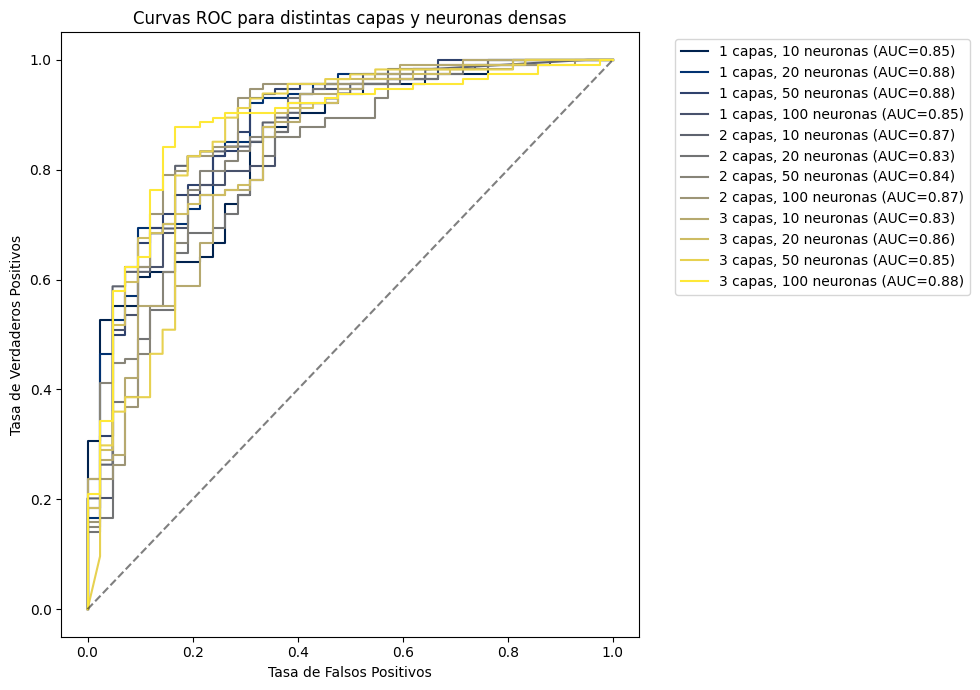

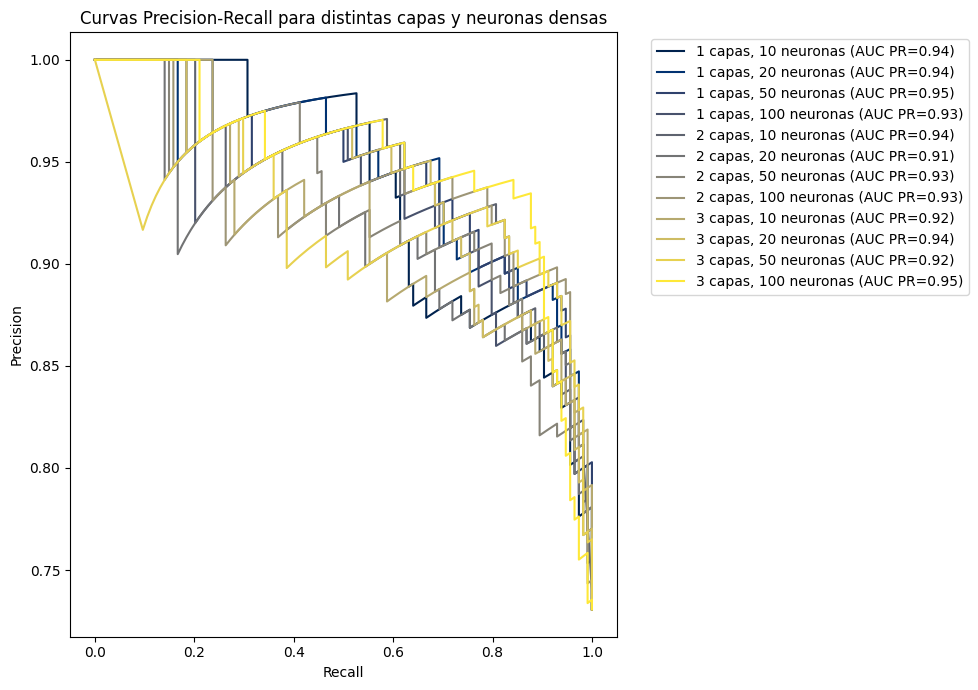

In [99]:
df_capas_densas = pd.DataFrame([
    {
        'Capas': r['Capas'],
        'Neuronas': r['Neuronas'],
        'Accuracy': r['Estadisticas']['accuracy'],
        'Precision': r['Estadisticas']['precision'],
        'Recall': r['Estadisticas']['recall'],
        'AUC ROC': r['Estadisticas']['roc_auc'],
        'AUC PR': r['Estadisticas']['auc_pr'],
        'ROC': r['Estadisticas']['roc_curve'],
        'PRC': r['Estadisticas']['precision_recall_curve']
    }
    for r in resultados_capas_densas
])

# Mostrar tabla de resultados principales
display(df_capas_densas[['Capas', 'Neuronas', 'Accuracy', 'Precision', 'Recall']])

# Gráfico ROC para todas las combinaciones de capas densas
plt.figure(figsize=(10, 7))
colors = plt.cm.cividis(np.linspace(0, 1, len(df_capas_densas)))
for idx, row in df_capas_densas.iterrows():
    label = f"{row['Capas']} capas, {row['Neuronas']} neuronas (AUC={row['AUC ROC']:.2f})"
    plt.plot(row['ROC'][0], row['ROC'][1], color=colors[idx], label=label)
plt.plot([0, 1], [0, 1], 'k--', alpha=0.5)
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curvas ROC para distintas capas y neuronas densas')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Gráfico Precision-Recall para todas las combinaciones de capas densas
plt.figure(figsize=(10, 7))
for idx, row in df_capas_densas.iterrows():
    label = f"{row['Capas']} capas, {row['Neuronas']} neuronas (AUC PR={row['AUC PR']:.2f})"
    plt.plot(row['PRC'][1], row['PRC'][0], color=colors[idx], label=label)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curvas Precision-Recall para distintas capas y neuronas densas')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Dropout de la capa final

In [102]:
dropout_rates_finales = [0.0, 0.2, 0.5, 0.7]
resultados_dropout_final = []
for rate in dropout_rates_finales:
    print(f'Entrenando modelo con Dropout final de {rate}...')
    modelo = modeloCustomizable(
        input_shape=(64, 64, 1),
        num_filtros=[30, 30],
        tamano_kernel=(9, 9),
        capas_densas=[100]*3,
        dropout_rate=[0, 0],
        dropout_rate_final=rate
    )
    tensorboard = TensorBoard(log_dir=f'logs/dropout_final_{rate}')
    modelo.fit(
        x_train64, y_train64,
        validation_data=(x_val64, y_val64),
        epochs=30,
        batch_size=32,
        callbacks=[tensorboard],
        verbose=0
    )
    est = generar_graficos(modelo, x_test64, y_test64, False)
    resultados_dropout_final.append({
        'Dropout Final': rate,
        'Estadisticas': est
    })

Entrenando modelo con Dropout final de 0.0...
Entrenando modelo con Dropout final de 0.2...
Entrenando modelo con Dropout final de 0.5...
Entrenando modelo con Dropout final de 0.7...


,Dropout Final,Accuracy,Precision,Recall
0,0.0,0.871795,0.885246,0.947368
1,0.2,0.833333,0.849206,0.938596
2,0.5,0.826923,0.891892,0.868421
3,0.7,0.839744,0.893805,0.885965


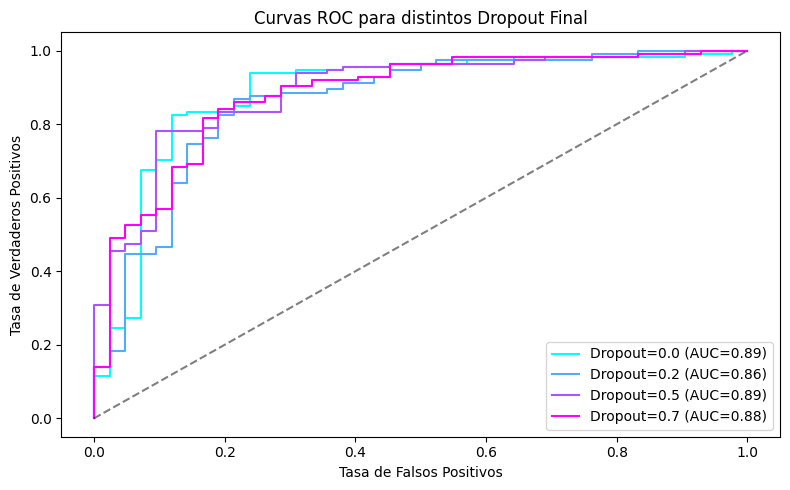

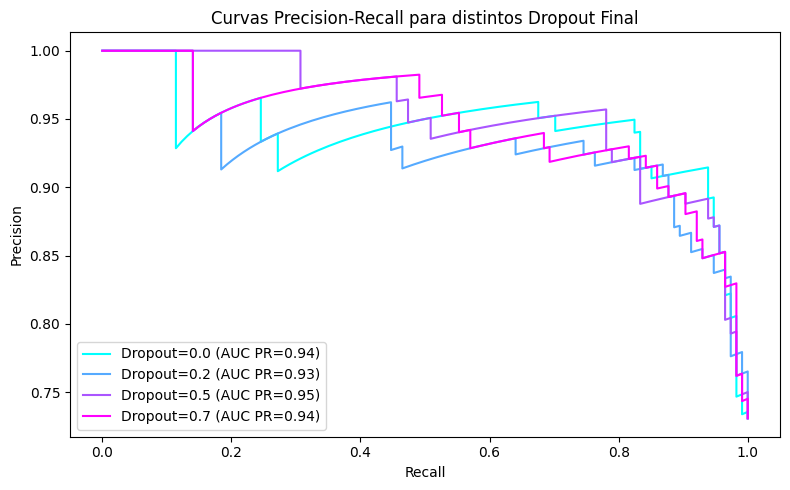

In [103]:
df_dropout_final = pd.DataFrame([
    {
        'Dropout Final': r['Dropout Final'],
        'Accuracy': r['Estadisticas']['accuracy'],
        'Precision': r['Estadisticas']['precision'],
        'Recall': r['Estadisticas']['recall'],
        'AUC ROC': r['Estadisticas']['roc_auc'],
        'AUC PR': r['Estadisticas']['auc_pr'],
        'ROC': r['Estadisticas']['roc_curve'],
        'PRC': r['Estadisticas']['precision_recall_curve']
    }
    for r in resultados_dropout_final
])

# Mostrar tabla de resultados principales
display(df_dropout_final[['Dropout Final', 'Accuracy', 'Precision', 'Recall']])

# Gráfico ROC para todas las combinaciones de dropout final
plt.figure(figsize=(8, 5))
colors = plt.cm.cool(np.linspace(0, 1, len(df_dropout_final)))
for idx, row in df_dropout_final.iterrows():
    label = f"Dropout={row['Dropout Final']} (AUC={row['AUC ROC']:.2f})"
    plt.plot(row['ROC'][0], row['ROC'][1], color=colors[idx], label=label)
plt.plot([0, 1], [0, 1], 'k--', alpha=0.5)
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curvas ROC para distintos Dropout Final')
plt.legend()
plt.tight_layout()
plt.show()

# Gráfico Precision-Recall para todas las combinaciones de dropout final
plt.figure(figsize=(8, 5))
for idx, row in df_dropout_final.iterrows():
    label = f"Dropout={row['Dropout Final']} (AUC PR={row['AUC PR']:.2f})"
    plt.plot(row['PRC'][1], row['PRC'][0], color=colors[idx], label=label)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curvas Precision-Recall para distintos Dropout Final')
plt.legend()
plt.tight_layout()

## Meta análisis

La combinación de hiperparámetros que mejores resultados obtuvo es:
- Capa de entrada con shape de 64x64x1
- Kernel con tamaño 9x9
- 2 capas convolucionales con 30 filtros cada una
- Ningún dropout para estas capas
- 3 capas densas de 100 neuronas
- Y ningún dropout final


In [109]:
mejor_modelo_base = modeloCustomizable(
    input_shape=(64, 64, 1),
    num_filtros=[30, 30],
    tamano_kernel=(9, 9),
    capas_densas=[100]*3,
    dropout_rate=[0, 0],
    dropout_rate_final=0
)
mejor_modelo_base.summary()

Model: "sequential_91"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_187 (Conv2D)             │ (None, 56, 56, 30)     │         2,460 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_187               │ (None, 28, 28, 30)     │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_188 (Conv2D)             │ (None, 20, 20, 30)     │        72,930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_188               │ (None, 10, 10, 30)     │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_93 (Flatten)            │ (None, 3000)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_88153 (Dense)             │ (None, 100)            │       300,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_88154 (Dense)             │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_88155 (Dense)             │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_88156 (Dense)             │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 395,791 (1.51 MB)

 Trainable params: 395,791 (1.51 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - accuracy: 0.6953 - loss: 0.6135 - val_accuracy: 0.7308 - val_loss: 0.5760
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.7321 - loss: 0.5601 - val_accuracy: 0.7308 - val_loss: 0.5465
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.7211 - loss: 0.5430 - val_accuracy: 0.7564 - val_loss: 0.5066
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.7714 - loss: 0.4856 - val_accuracy: 0.7692 - val_loss: 0.5105
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.7780 - loss: 0.5091 - val_accuracy: 0.7949 - val_loss: 0.4655
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.8005 - loss: 0.4975 - val_accuracy: 0.7692 - val_loss: 0.5033
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.7741 - loss: 0.5152 - val_accuracy: 0.7821 - val_loss: 0.4667
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.7689 - loss: 0.4824 - val_accuracy: 0.

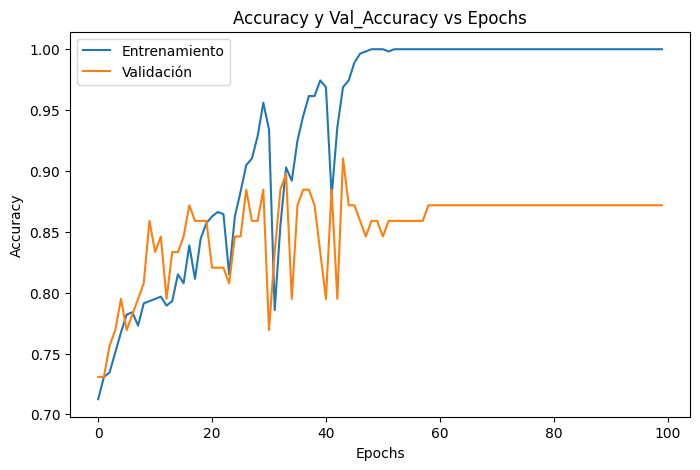

In [110]:
history = mejor_modelo_base.fit(
    x_train64, y_train64,
    validation_data=(x_val64, y_val64),
    epochs=100,
    batch_size=32,
    callbacks=[TensorBoard(log_dir='logs/mejor_modelo_base')],
    verbose=1
)

plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy y Val_Accuracy vs Epochs')
plt.legend()
plt.show()

In [ ]:
mejor_modelo_base.save('mejor_modelo_base.keras')